In [204]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
df = pd.read_csv('./data/prototype_data/main.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188317 entries, 0 to 188316
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Open Time                     188317 non-null  int64  
 1   Open                          188317 non-null  float64
 2   High                          188317 non-null  float64
 3   Low                           188317 non-null  float64
 4   Close                         188317 non-null  float64
 5   Volume                        188317 non-null  float64
 6   Close Time                    188317 non-null  int64  
 7   Quote asset volume            188317 non-null  float64
 8   Number of trades              188317 non-null  int64  
 9   Taker buy base asset volume   188317 non-null  float64
 10  Taker buy quote asset volume  188317 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 15.8 MB
None


In [11]:
print(df.describe())

          Open Time           Open           High            Low  \
count  1.883170e+05  188317.000000  188317.000000  188317.000000   
mean   1.615118e+12   48807.250870   48850.022846   48764.186791   
std    3.271344e+09    9845.576682    9843.437596    9847.738664   
min    1.609459e+12   28241.950000   28764.230000   28130.000000   
25%    1.612284e+12   38457.420000   38496.190000   38415.000000   
50%    1.615119e+12   51800.000000   51842.340000   51752.100000   
75%    1.617944e+12   57054.250000   57092.630000   57014.750000   
max    1.620794e+12   64800.000000   64854.000000   64685.170000   

               Close         Volume    Close Time  Quote asset volume  \
count  188317.000000  188317.000000  1.883170e+05        1.883170e+05   
mean    48807.413975      57.316303  1.615118e+12        2.678839e+06   
std      9845.500077      60.822888  3.271344e+09        2.696383e+06   
min     28235.470000       0.000000  1.609459e+12        0.000000e+00   
25%     38458.990000  

In [12]:
print(df.head(5))

       Open Time      Open      High       Low     Close     Volume  \
0  1609459200000  28923.63  28961.66  28913.12  28961.66  27.457032   
1  1609459260000  28961.67  29017.50  28961.01  29009.91  58.477501   
2  1609459320000  29009.54  29016.71  28973.58  28989.30  42.470329   
3  1609459380000  28989.68  28999.85  28972.33  28982.69  30.360677   
4  1609459440000  28982.67  28995.93  28971.80  28975.65  24.124339   

      Close Time  Quote asset volume  Number of trades  \
0  1609459259999        7.943820e+05              1292   
1  1609459319999        1.695803e+06              1651   
2  1609459379999        1.231359e+06               986   
3  1609459439999        8.800168e+05               959   
4  1609459499999        6.992262e+05               726   

   Taker buy base asset volume  Taker buy quote asset volume  
0                    16.777195                 485390.826825  
1                    33.733818                 978176.468202  
2                    13.247444     

In [250]:
# Convert 'Open Time' and 'Close Time' from unix timestamp to human-readable time
df['Open Time(human-readable)'] = pd.to_datetime(df['Open Time'], unit='ms')
df['Close Time(human-readable)'] = pd.to_datetime(df['Close Time'], unit='ms')

# Display the first 5 rows of the dataframe
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Open Time(human-readable),Close Time(human-readable)
188312,1620794100000,57517.42,57526.28,57485.00,57485.07,42.575735,1620794159999,2.448258e+06,1195,15.319691,880913.090845,2021-05-12 04:35:00,2021-05-12 04:35:59.999
188313,1620794160000,57485.07,57496.42,57466.75,57481.49,34.205467,1620794219999,1.966194e+06,1096,15.971891,918058.816162,2021-05-12 04:36:00,2021-05-12 04:36:59.999
188314,1620794220000,57477.18,57509.99,57458.18,57470.00,30.211789,1620794279999,1.736514e+06,955,13.054229,750364.577319,2021-05-12 04:37:00,2021-05-12 04:37:59.999
188315,1620794280000,57470.00,57470.01,57400.00,57450.90,45.354728,1620794339999,2.605080e+06,1559,12.615628,724559.233035,2021-05-12 04:38:00,2021-05-12 04:38:59.999
188316,1620794340000,57450.89,57475.66,57435.51,57450.19,14.168318,1620794399999,8.140594e+05,730,7.247751,416412.022206,2021-05-12 04:39:00,2021-05-12 04:39:59.999


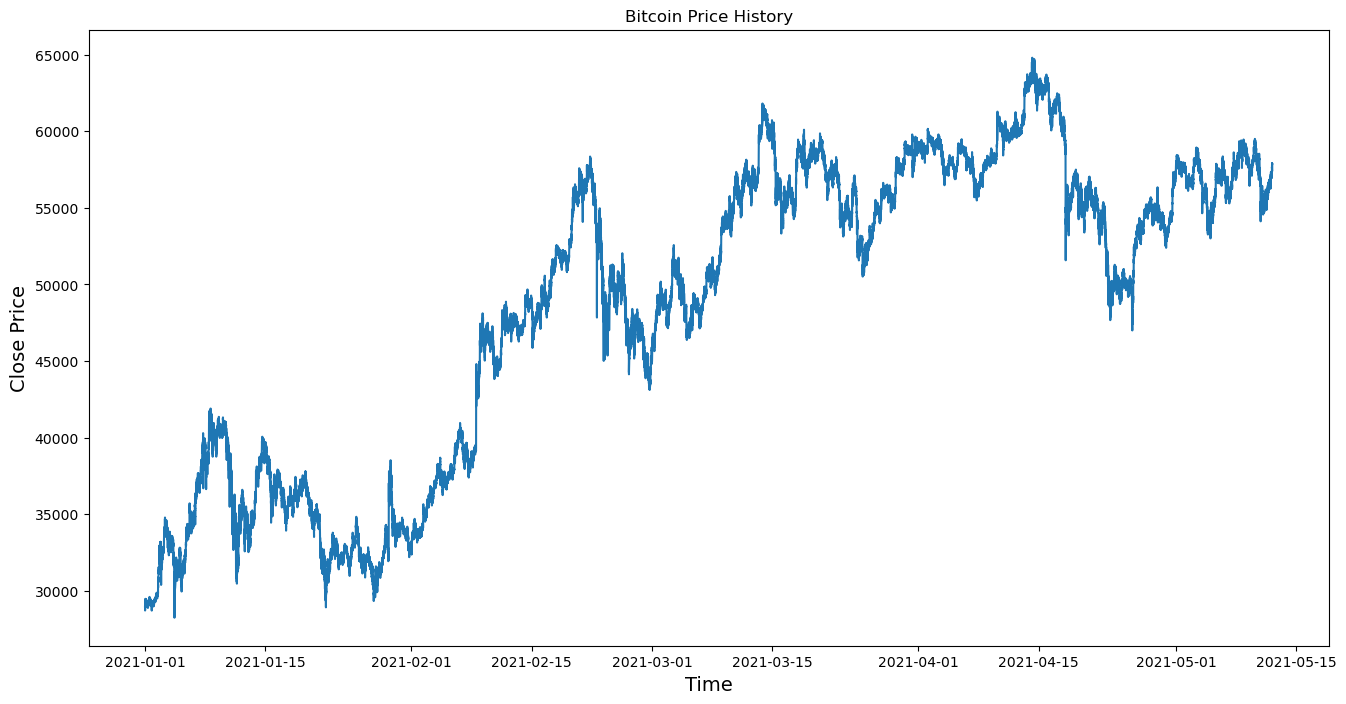

In [15]:
# Visualize the close price history
plt.figure(figsize=(16, 8))
plt.title("Bitcoin Price History")
plt.plot(df["Close Time(human-readable)"], df["Close"])
plt.xlabel("Time", fontsize=14,)
plt.ylabel("Close Price", fontsize=14)
plt.show()

In [253]:
# Create new data with only the "Close" column
close_price = df.filter(["Close"])
close_price['close_date'] = df['Close Time(human-readable)']

# Set 'close_date' as the index
close_price.set_index('close_date', inplace=True)

close_price_array = close_price.values
close_price_array

array([[28961.66],
       [29009.91],
       [28989.3 ],
       ...,
       [57470.  ],
       [57450.9 ],
       [57450.19]])

array([[<Axes: title={'center': 'Close'}>]], dtype=object)

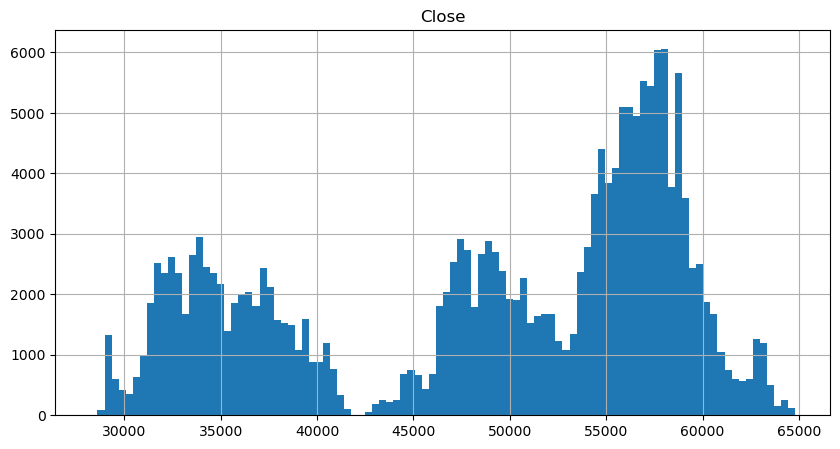

In [55]:
close_price.hist(bins=100, figsize=(10, 5))

In [96]:
#Normalize the data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(close_price)
minmax_scaled_data

array([[0.0198605 ],
       [0.02118009],
       [0.02061643],
       ...,
       [0.7995325 ],
       [0.79901013],
       [0.79899072]])

In [37]:
#Normalize the data with StandardScaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(close_price)
standard_scaled_data

array([[-2.01572358],
       [-2.01082285],
       [-2.0129162 ],
       ...,
       [ 0.87985465],
       [ 0.87791467],
       [ 0.87784256]])

In [95]:
# Create X_train and y_train
# Using the previous 60 data to predict the next one
X_train = []
Y_train = []
for i in range(60, len(minmax_scaled_data)): #Starting from 60 because we need 60 previous data to predict the next one
    X_train.append(minmax_scaled_data[i - 60 : i, 0]) #Get the previous 60 data
    Y_train.append(minmax_scaled_data[i, 0]) #Get the next data`
print(X_train[0])
print(Y_train[0])

[0.0198605  0.02118009 0.02061643 0.02043565 0.02024312 0.01918909
 0.01937397 0.01912701 0.01817417 0.01705122 0.01677062 0.01610523
 0.01649714 0.01288599 0.01414841 0.01461252 0.01571277 0.01545487
 0.01607405 0.01600595 0.01432755 0.01533617 0.01533782 0.01639676
 0.01670991 0.01738871 0.01665576 0.01652148 0.01636805 0.01644107
 0.01751096 0.01704001 0.01740758 0.01790068 0.01763758 0.019028
 0.01895908 0.01856116 0.01822641 0.01811865 0.01892162 0.01854201
 0.01872088 0.01863719 0.01899765 0.01802348 0.01896975 0.01923421
 0.01925746 0.01944097 0.01958127 0.01951208 0.01997892 0.01998029
 0.0194623  0.0197801  0.02000327 0.02133023 0.02150062 0.02077587]
0.020570481830342158


In [123]:
# Initialize the dataset
from torch.utils.data import Dataset, Subset
class PriceDataset(Dataset):
    
    def __init__(self, close_price_seq, pred_close_price):
        self.close_price_seq = close_price_seq
        self.pred_close_price = pred_close_price

    def __len__(self):
        return len(self.close_price_seq)
    
    def __getitem__(self, index):
        return (self.close_price_seq[index],  self.pred_close_price[index])
    
#original_dataset = PriceDataset(close_price_array)

minmax_dataset = PriceDataset(X_train, Y_train)

#standard_dataset = PriceDataset(standard_scaled_data)
print('Size of dataset:', len(minmax_dataset))

Size of dataset: 188257


In [124]:
# Split the dataset into training, validation, and test sets
from torch.utils.data.dataset import random_split

# Calculate the sizes of the splits
train_size = int(0.8 * len(minmax_dataset))
val_size = int(0.1 * len(minmax_dataset ))
test_size = len(minmax_dataset ) - train_size - val_size

# Create indices for the splits
indices = list(range(len(minmax_dataset)))
train_indices = indices[:train_size]
val_indices = indices[train_size:(train_size + val_size)]
test_indices = indices[(train_size + val_size):]

#train_set, val_set, test_set = Subset(original_dataset, train_indices), Subset(original_dataset, val_indices), Subset(original_dataset, test_indices)
minmax_train_set, minmax_val_set, minmax_test_set = Subset(minmax_dataset, train_indices), Subset(minmax_dataset, val_indices ), Subset(minmax_dataset, test_indices)
#standard_train_set, standard_val_set, standard_test_set = Subset(standard_dataset, train_indices), Subset(standard_dataset, val_indices ), Subset(standard_dataset, test_indices)

print("Length of train dataset:", len(minmax_train_set))
print("Length of validation dataset:", len(minmax_val_set))
print("Length of test dataset:", len(minmax_test_set))

Length of train dataset: 150605
Length of validation dataset: 18825
Length of test dataset: 18827


In [157]:
from torch.utils.data import DataLoader

# how many samples per batch to load
batch_size = 128

# prepare dataloaders
"""train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size)
test_loader = DataLoader(test_set, batch_size=batch_size)"""

minmax_train_loader = DataLoader(minmax_train_set, batch_size=batch_size, shuffle=True)
minmax_val_loader = DataLoader(minmax_val_set, batch_size=batch_size)
minmax_test_loader = DataLoader(minmax_test_set, batch_size=batch_size)

"""standard_train_loader = DataLoader(standard_train_set, batch_size=batch_size, shuffle=True)
standard_val_loader = DataLoader(standard_val_set, batch_size=batch_size)
standard_test_loader = DataLoader(standard_test_set, batch_size=batch_size)"""

print("# of train batches:", len(minmax_train_loader))
print("# of train batches:", len(minmax_val_loader))
print("# of test batches:", len(minmax_test_loader))

# of train batches: 1177
# of train batches: 148
# of test batches: 148


In [205]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        #print('x:', x.shape)
        #print('h0:', h0.shape)
        #print('c0:', c0.shape)
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

In [263]:
from sklearn.metrics import mean_squared_error
def evaluate(model, loader):
    model.eval()
    all_y_true = []
    all_y_pred = []
    for x, y in loader:
        x = x.view(x.shape[0], x.shape[1], 1)  # Reshape input tensor to have the correct dimensions
        x = x.float().to(device)
        y_pred = model(x)
        
        y_pred = minmax_scaler.inverse_transform(y_pred.to('cpu').detach().numpy().reshape(-1, 1))
        y = minmax_scaler.inverse_transform(y.to('cpu').detach().numpy().reshape(-1, 1))
        

        all_y_true.append(y[0])
        all_y_pred.append(y_pred[0])
        mse = mean_squared_error(all_y_true, all_y_pred)
    #print(f"mse: {mse:.3f}")
    return mse, all_y_true, all_y_pred

In [289]:
input_size= 1
hidden_size = 32
num_layers = 5 
output_size = 1

In [290]:
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


In [291]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for x, y in minmax_train_loader:
        x = x.float()  # Convert input data to torch.float32 type
        y = y.float()  # Convert target data to torch.float32 type
        x = x.view(x.shape[0], x.shape[1], 1)  # Reshape input tensor to have the correct dimensions
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()

        y_hat = model(x)

        # convert shape from [batch size, 1] to [batch size]
        y_hat = y_hat.view(y_hat.shape[0])
        loss = loss_fn(y_hat, y)

        loss.backward()

        optimizer.step()

        train_loss += loss.item()
            
    train_loss = train_loss / len(minmax_train_loader)
    if epoch % 10 == 0:
        mse, _, _ = evaluate(model, minmax_val_loader)
        print('Epoch: {} \tTraining Loss: {:.6f} \tMSE: {:.6f}'.format(epoch, train_loss, mse))
    


Epoch: 0 	Training Loss: 0.046149 	MSE: 115523.997120
Epoch: 10 	Training Loss: 0.000040 	MSE: 68668.785070
Epoch: 20 	Training Loss: 0.000030 	MSE: 52268.118293
Epoch: 30 	Training Loss: 0.000023 	MSE: 58193.001346
Epoch: 40 	Training Loss: 0.000018 	MSE: 29632.246920
Epoch: 50 	Training Loss: 0.000015 	MSE: 26742.624995
Epoch: 60 	Training Loss: 0.000012 	MSE: 26075.187502
Epoch: 70 	Training Loss: 0.000009 	MSE: 13405.124170
Epoch: 80 	Training Loss: 0.000008 	MSE: 10576.592674
Epoch: 90 	Training Loss: 0.000007 	MSE: 9158.320526


In [292]:
mse, y_test, y_test_pred = evaluate(model, minmax_test_loader)
mse

3975.4816178829833

In [296]:
def baseline_model(x):
    return x[-1]

def evaluate_baseline_model(model, loader):
    all_y_true = []
    all_y_pred = []
    for x, y in loader:
        print
        y_pred = model(x)
        
        y_pred = minmax_scaler.inverse_transform(y_pred.reshape(-1, 1))
        y = minmax_scaler.inverse_transform(y.reshape(-1, 1))
        

        all_y_true.append(y[0])
        all_y_pred.append(y_pred[0])
        mse = mean_squared_error(all_y_true, all_y_pred)
    #print(f"mse: {mse:.3f}")
    return mse, all_y_true, all_y_pred
baseline_model_mse, y_test, baseline_model_y_test_pred = evaluate_baseline_model(baseline_model, minmax_test_loader)
baseline_model_mse

155420.49750067585

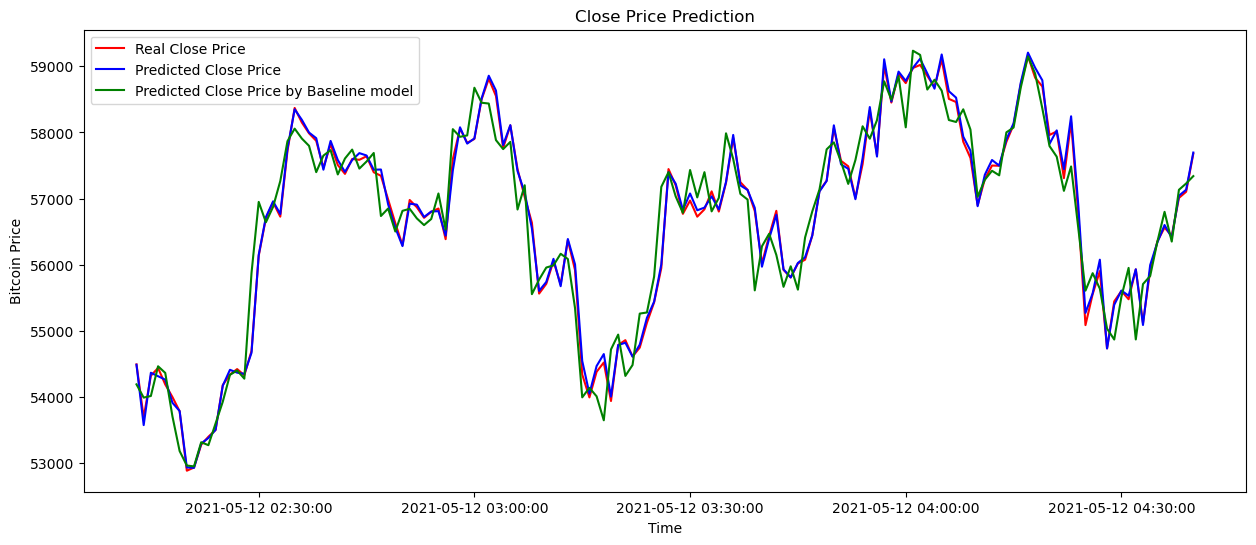

In [294]:
import matplotlib.dates as mdates
figure, axes = plt.subplots(figsize=(15, 6))

axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

axes.plot(close_price[len(close_price)-len(y_test):].index, y_test, color = 'red', label = 'Real Close Price')
axes.plot(close_price[len(close_price)-len(y_test):].index, y_test_pred, color = 'blue', label = 'Predicted Close Price')
axes.plot(close_price[len(close_price)-len(y_test):].index, baseline_model_y_test_pred, color = 'green', label = 'Predicted Close Price by Baseline model')

plt.title('Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.savefig('bit_pred.png')
plt.show()